In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("/home/cocopyth/MasterThesis/src/")
from make_dataset import *
from config import *
from model import *
from data_prepare import *

2024-01-18 16:19:19.020448: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-18 16:19:19.021145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/cocopyth/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2024-01-18 16:19:55.858169: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/cocopyth/MasterThesis/ML/lib/python3.9/site-packages/cv2/../../lib64:
2024-01-18 16:19:55.859890: W tensorflow/stream_executor/cuda/cuda_

In [2]:
data_list_k = ["20221116_Plate21","20230109_Plate521","20230111_Plate521","20230113_Plate521","20230111_Plate493"]
data_list_f = ["varying_lum_and_focus_train","varying_lum_and_focus_test"]
X_train_k, y_train_k, X_test_k , y_test_k = combine_dataset(data_list_k,2)
X_train_f, y_train_f, X_test_f , y_test_f = combine_dataset(data_list_f,1)
X_train = np.concatenate([X_train_k,X_train_f], axis=0)
X_test  = np.concatenate ([X_test_k ,X_test_f] , axis=0)
y_train = np.concatenate([y_train_k,y_train_f], axis=0)
y_test  = np.concatenate ([y_test_k ,y_test_f] , axis=0)
X = np.concatenate([X_train,X_test], axis=0)
y = np.concatenate([y_train,y_test], axis=0)

/home/cocopyth/MasterThesis/src/data_prepare.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_list, y_train_list, X_test_list , y_test_list = np.array(X_train_list), np.array(y_train_list), np.array(X_test_list) , np.array(y_test_list)


In [3]:
sorted_indices = np.argsort(list(y.flatten()))
sorted_X = X[sorted_indices]
sorted_y = y[sorted_indices]


In [4]:
path_figure = r"/mnt/c/Users/coren/Documents/PhD/paper/PandC/Fig1"


2023-12-26 22:02:09,372-[INFO]- fontTools.subset:2835 -> maxp pruned
2023-12-26 22:02:09,384-[INFO]- fontTools.subset:2835 -> cmap pruned
2023-12-26 22:02:09,385-[INFO]- fontTools.subset:2819 -> kern dropped
2023-12-26 22:02:09,386-[INFO]- fontTools.subset:2835 -> post pruned
2023-12-26 22:02:09,387-[INFO]- fontTools.subset:2819 -> FFTM dropped
2023-12-26 22:02:09,391-[INFO]- fontTools.subset:2835 -> GPOS pruned
2023-12-26 22:02:09,396-[INFO]- fontTools.subset:2835 -> GSUB pruned
2023-12-26 22:02:09,398-[INFO]- fontTools.subset:2835 -> name pruned
2023-12-26 22:02:09,413-[INFO]- fontTools.subset:2835 -> glyf pruned
2023-12-26 22:02:09,416-[INFO]- fontTools.subset:2875 -> Added gid0 to subset
2023-12-26 22:02:09,417-[INFO]- fontTools.subset:2883 -> Added first four glyphs to subset
2023-12-26 22:02:09,417-[INFO]- fontTools.subset:2887 -> Closing glyph list over 'GSUB': 7 glyphs before
2023-12-26 22:02:09,418-[INFO]- fontTools.subset:446 -> Glyph names: ['.notdef', '.null', 'nonmarkingre

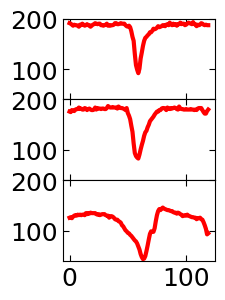

In [130]:
plt.style.use('presentation.mplstyle')

import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration

# Indices for the subplots
indices = [len(sorted_X)//4+10, 2*len(sorted_X)//4, 3*len(sorted_X)//4]
cm = 1/2.54  # centimeters in inches

# Create figure and subplots
fig, axs = plt.subplots(len(indices), 1, figsize=(5*cm, 8*cm),sharex= True,sharey=True)

for i, ax in zip(indices, axs):
    # Plotting each graph
    ax.plot(sorted_X[i, :],color="red")
    ax.set_ylim(40,200)

# ax.set_xlabel('pixel\n index')
# ax.set_ylabel('pixel value',loc="bottom")
fig.subplots_adjust(hspace=0)
# ax.set_xticks([])
plt.savefig(os.path.join(path_figure,'Figure1A.pdf'), transparent=True, bbox_inches='tight')


TypeError: set_ticks() missing 1 required positional argument: 'ticks'

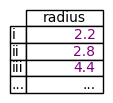

In [121]:
indices = [len(sorted_X)//4+10, 2*len(sorted_X)//4, 3*len(sorted_X)//4]

formatted_y = [[f"{(val/2):.1f}"] for val in sorted_y[indices].flatten()]
formatted_y +=[["..."]]
fig, ax = plt.subplots(figsize=(1, 1))  # Adjust the figure size as needed

# Create the table
columns = ['radius']
rows = ['i', 'ii', 'iii','...']
table = ax.table(cellText=formatted_y, colLabels=columns, rowLabels=rows, loc='center')
for i in range(1,len(rows)):  # Iterate over the number of rows
    cell = table[(i, 0)]  # (row, column) - 0 is the column for 'radius'
    cell.set_text_props(color='purple') 
# Hide axes
ax.axis('off')
# Adjust layout
plt.savefig(os.path.join(path_figure,'Figure1B.pdf'), transparent=True, bbox_inches='tight')


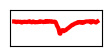

In [133]:
plt.style.use('presentation.mplstyle')

import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration

# Indices for the subplots
i = 2*len(sorted_X)//4+20

# Create figure and subplots
fig, ax = plt.subplots(figsize=(3*cm, 1.2*cm))

# Plotting each graph
ax.plot(sorted_X[i, :],color="red")
ax.set_ylim(40,200)
ax.set_xticks([])
ax.set_yticks([])

# ax.set_xlabel('pixel\n index')
# ax.set_ylabel('pixel value',loc="bottom")
fig.subplots_adjust(hspace=0)
plt.savefig(os.path.join(path_figure,'Figure1C.pdf'), transparent=True, bbox_inches='tight')


In [132]:
sorted_y[i, :]/2

array([2.8418356175501316], dtype=object)